In [2]:
import rasterio 
from rasterio.plot import show

In [3]:
im09 = rasterio.open('00027724_2009_USFS-BLUE-MOUNTAINS_NAIP_DOQQ-cog.tif')

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


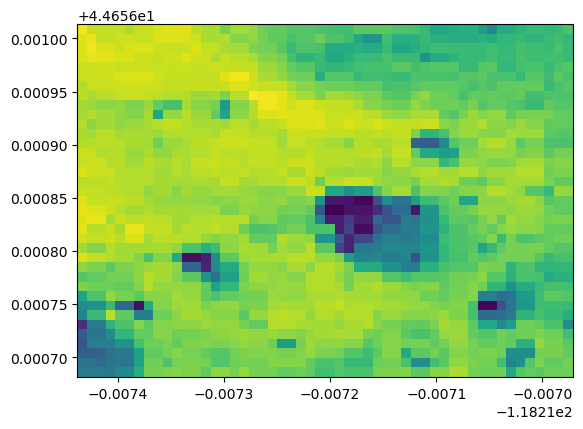

<Axes: >

In [4]:
show(im09.read([3,2,1]))

In [5]:
im14 = rasterio.open('00027724_2014_USFS-BLUE-MOUNTAINS_NAIP_DOQQ-cog.tif')

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


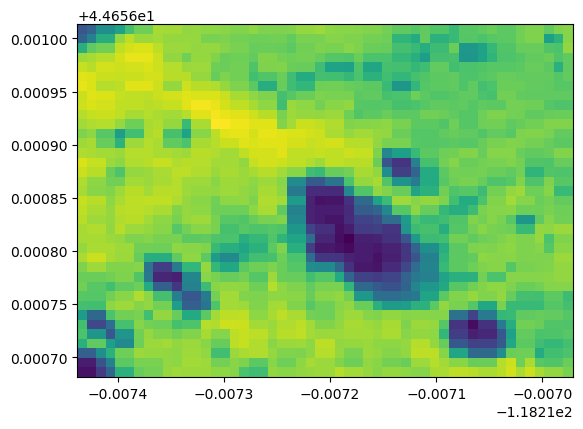

<Axes: >

In [6]:
show(im14)

In [7]:
im14.transform

Affine(8.983152841195214e-06, 0.0, -118.2174379906091,
       0.0, -8.983152841195214e-06, 44.657013471538285)

In [8]:
im14.shape

(37, 52)

In [9]:
from geoarray import GeoArray
from arosics import COREG

In [10]:
geoArr  = GeoArray('00027724_2009_USFS-BLUE-MOUNTAINS_NAIP_DOQQ-cog.tif')
ref_ndarray = geoArr[:]            # numpy.ndarray with shape (10980, 10980)
ref_gt      = geoArr.geotransform  # GDAL geotransform: (300000.0, 10.0, 0.0, 5900040.0, 0.0, -10.0)
ref_prj     = geoArr.projection 

Warning 1: 00027724_2009_USFS-BLUE-MOUNTAINS_NAIP_DOQQ-cog.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: 00027724_2009_USFS-BLUE-MOUNTAINS_NAIP_DOQQ-cog.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: 00027724_2009_USFS-BLUE-MOUNTAINS_NAIP_DOQQ-cog.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: 00027724_2009_USFS-BLUE-MOUNTAINS_NAIP_DOQQ-cog.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


In [11]:
geoArr  = GeoArray('00027724_2014_USFS-BLUE-MOUNTAINS_NAIP_DOQQ-cog.tif')
tgt_ndarray = geoArr[:]            # numpy.ndarray with shape (10980, 10980)
tgt_gt      = geoArr.geotransform  # GDAL geotransform: (300000.0, 10.0, 0.0, 5900040.0, 0.0, -10.0)
tgt_prj     = geoArr.projection 


Warning 1: 00027724_2014_USFS-BLUE-MOUNTAINS_NAIP_DOQQ-cog.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: 00027724_2014_USFS-BLUE-MOUNTAINS_NAIP_DOQQ-cog.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: 00027724_2014_USFS-BLUE-MOUNTAINS_NAIP_DOQQ-cog.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: 00027724_2014_USFS-BLUE-MOUNTAINS_NAIP_DOQQ-cog.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


In [12]:
geoArr_reference = GeoArray(ref_ndarray, ref_gt, ref_prj)
geoArr_target    = GeoArray(tgt_ndarray, tgt_gt, tgt_prj)

In [13]:
CR = COREG(geoArr_reference, geoArr_target, path_out='corrected_000227724',
           wp=(-118.2174379906091, 44.657013471538285), ws=(100,100))
CR.calculate_spatial_shifts()

Calculating footprint polygon and actual data corner coordinates for reference image...
Bounding box of calculated footprint for reference image:
	(-118.2174379906091, 44.65668109488316, -118.21697086666136, 44.657013471538285)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Bounding box of calculated footprint for image to be shifted:
	(-118.2174379906091, 44.65668109488316, -118.21697086666136, 44.657013471538285)
Matching window position (X,Y): -118.2174379906091/44.657013471538285
Target window size (100, 100) not possible due to too small overlap area or window position too close to an image edge. New matching window size: (48, 34).
Detected integer shifts (X/Y):                            3/-2
Detected subpixel shifts (X/Y):                           -0.29838454271533926/0.17557116028830244
Calculated total shifts in fft pixel units (X/Y):         2.7016154572846607/-1.8244288397116977
Calculated total shifts in reference pixel units (X

'success'

In [14]:
CR.correct_shifts()

Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Correcting geometric shifts...
Writing GeoArray of size (36, 51, 4) to /home/yankuic/Downloads/coregistration/corrected_000227724.


OrderedDict([('band', None),
             ('is shifted', True),
             ('is resampled', True),
             ('updated map info',
              ['Geographic Lat/Lon',
               1.0,
               1.0,
               -118.21743168789021,
               44.657011894355726,
               8.983152838482056e-06,
               8.983152838482056e-06,
               'WGS-84']),
             ('updated geotransform',
              (-118.21743168789021,
               8.983152838482056e-06,
               0.0,
               44.657011894355726,
               0.0,
               -8.983152838482056e-06)),
             ('updated projection',
              'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
             ('arr_shifted',
